In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
import seaborn as sns

In [51]:
df = pd.read_csv('smogn.csv')

x = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
mlp = MLPRegressor(hidden_layer_sizes=(50,),
                   activation='relu',
                   solver='adam',
                   max_iter=500,
                   random_state=42)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R²: {r2:.4f}')

MSE: 6.6986
RMSE: 2.5882
MAE: 1.9787
R²: 0.6953


/home/vkzy/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
y_train_pred = mlp.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Treino -> MSE: {mse_train:.4f}, R²: {r2_train:.4f}')
print(f'Teste  -> MSE: {mse:.4f}, R²: {r2:.4f}')

Treino -> MSE: 1.7712, R²: 0.9189
Teste  -> MSE: 6.6986, R²: 0.6953


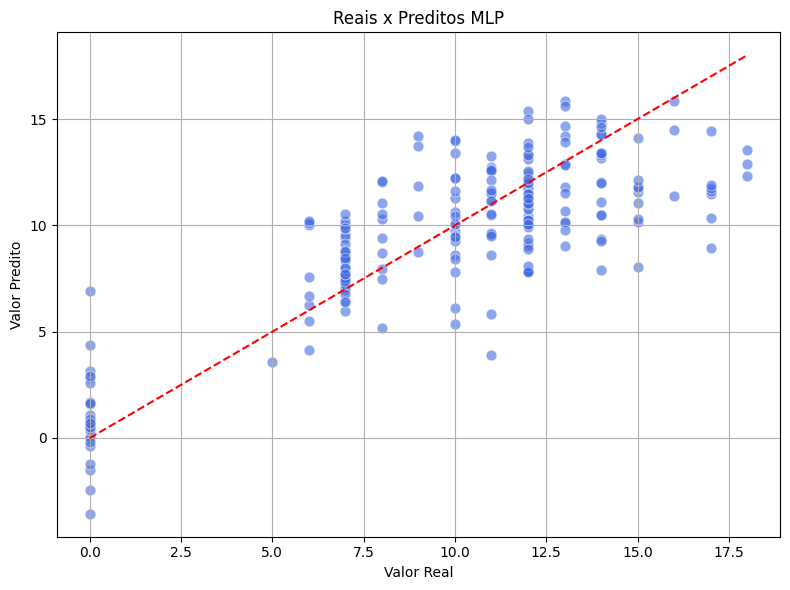

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=60, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Reais x Preditos MLP')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
resultados = pd.DataFrame({'Real': y_test.values, 'Predito': y_pred})
print(resultados)

     Real    Predito
0     5.0  10.950363
1    12.0   8.471837
2     0.0   1.813041
3    12.0   8.769546
4     8.0  10.020733
..    ...        ...
112   7.0   3.967653
113   0.0   4.365606
114  10.0   6.560362
115   6.0   6.885429
116   0.0   0.661277

[117 rows x 2 columns]
